In [35]:
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from random import randint
from collections import Counter 
import collections
import statistics
import time
from itertools import chain 
import random
import operator
import copy
import networkx as nx

In [36]:
random.seed(42)

### Importing and exploring data

In [37]:
dataset = pd.read_csv('C://Users//Eloisa//Desktop//UNI LORENZO//ADM//Homework 5//wikigraph_reduced.csv', sep='\t', 
                      delimiter=None, header='infer',
                      names=None, index_col=None, 
                      usecols=None, 
                      encoding = "ISO-8859-1")
dataset.head()

,Unnamed: 0,0,1
0,796,95,1185516
1,909,108,1059989
2,910,108,1062426
3,911,108,1161925
4,1141,134,541222


In [38]:
dataset.columns=['Index','Source','Target']

In [39]:
# check if index columns has unique values
print(len(dataset.Index))
print(len(set(dataset.Index)))

483094
483094


In [40]:
dataset.set_index('Index' , inplace = True)
dataset.head()

,Source,Target
Index,,
796,95,1185516
909,108,1059989
910,108,1062426
911,108,1161925
1141,134,541222


### Associate single category to each node

In [41]:
# all nodes in and out
unique_nodes = set(set(dataset.Source).union(set(dataset.Target)))
n_nodes = len(unique_nodes)
n_edges = len(dataset)

In [42]:
category_file = 'C://Users//Eloisa//Desktop//UNI LORENZO//ADM//Homework 5//wiki-topcats-categories.txt'

Non filtered categories

In [43]:
categories_all = {v: [] for v in unique_nodes}
no_category = []

with open(category_file) as file:
    for i in range(17364):
        line = file.readline()
        category = line.split(';')[0].split(':')[-1]
        nodes = line.split(';')[1].split(' ')[1:-2]
        
        for node in nodes:
            try:
                categories_all[int(node)].append(category)
            except:
                no_category.append(int(node))

Filtering categories

In [44]:
nodes_category = {}
for n in categories_all.keys():
    try:
        rand_category = random.choice(categories_all[n])
        nodes_category[n] = rand_category
    except:
        nodes_category[n] = None

In [45]:
category_nodes = {category:[] for category in set(nodes_category.values())}
for node in nodes_category.keys():
    try:
        category_nodes[nodes_category[node]].append(node)
    except:
        continue

### Create graph

In [46]:
in_links = {v: [] for v in set(dataset.Target)}
out_links = {v: [] for v in set(dataset.Source)}

for row in dataset.iterrows():
    source = row[1][0]
    target = row[1][1]
    in_links[target].append(source)
    out_links[source].append(target)

In [47]:
n_art_outlink = len(out_links)
n_art_inlink = len(in_links)

### In and out degree

In [48]:
in_d = [] 
for node in in_links.keys():
    in_d.append(len(in_links[node]))

in_degree = dict(zip(in_links.keys(), in_d)) # dictionary with in-degree

In [49]:
out_d = [] 
for node in out_links.keys():
    out_d.append(len(out_links[node]))

out_degree = dict(zip(out_links.keys(), out_d)) # dictionary with out-degree

### Creating the graph with networkx

In [225]:
Gd = nx.DiGraph()

In [226]:
for row in dataset.iterrows():
    Gd.add_edge(row[1][0], row[1][1], capacity=1)

In [227]:
def add_categories(my_category, G):
    for i in my_category.keys():
        G.nodes[i]['category']=my_category[i]
    return G

In [228]:
add_categories(nodes_category, Gd)

## RQ2

In order to build the requested function we essentially used the explore function defined in the python file and then we adapted the output to the request. <br> In the following function we return indeed just the list of nodes visited in d clicks instead of the dictionary obtained from the explore function. 

In [23]:
'''This function works as the explore function defined above, but with a different output format.'''
def get_articles(node,n_clicks):
    tree = explore(node_id,n_clicks)
    articles = []
    for d in tree.keys():
        articles+=tree[d]
    return articles

At this point we decide to select three different nodes with different out-degrees:


In [24]:
a = 108
out_degree.get(a)


3

In [25]:
b = 786913
out_degree.get(b)


268

In [26]:
c = 786773
out_degree.get(c)


39

Now we see how many articles each node can reach in a fixed number of clicks ( in our case 10) and the we will comment the results:

In [27]:
%%time
n_clicks = 10
node_id = a
articles = get_articles(node_id,n_clicks)
print('Number of articles reached within', n_clicks, 'from node', node_id,':', len(articles))

Number of articles reached within 10 from node 108 : 63217
Wall time: 1min 13s


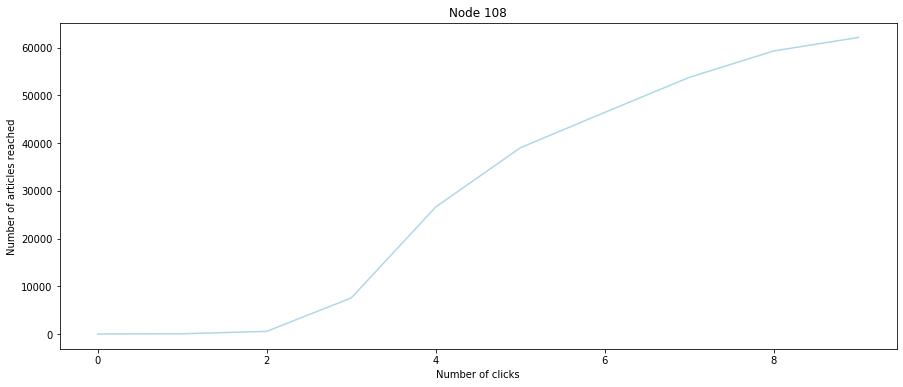

In [28]:
graph = []
for n_clicks in range(10):
    graph.append(len(get_articles(node_id,n_clicks)))
plt.figure(figsize = (15,6))
plt.plot(graph,color = 'lightblue');
plt.ylabel('Number of articles reached')
plt.xlabel('Number of clicks')
plt.title(f'Node {node_id}')
plt.show()

In [29]:
%%time
n_clicks = 10
node_id = b
articles = get_articles(node_id,n_clicks)
print('Number of articles reached within', n_clicks, 'from node', node_id,':', len(articles))

Number of articles reached within 10 from node 786913 : 6605
Wall time: 449 ms


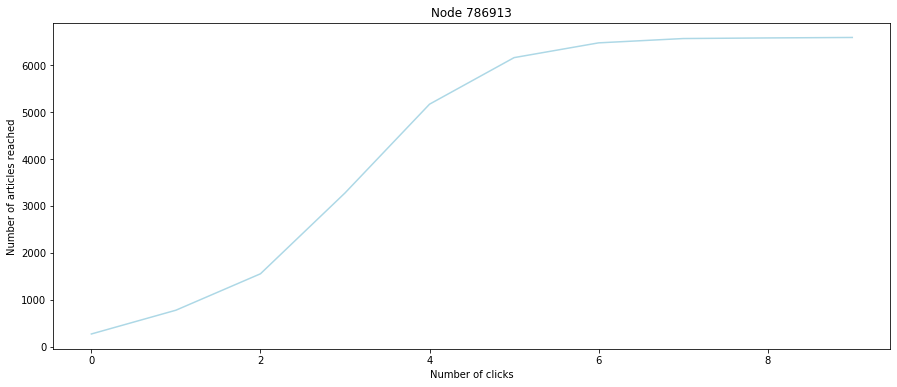

In [30]:
graph = []
for n_clicks in range(10):
    graph.append(len(get_articles(node_id,n_clicks)))
plt.figure(figsize = (15,6))
plt.plot(graph,color = 'lightblue');
plt.ylabel('Number of articles reached')
plt.xlabel('Number of clicks')
plt.title(f'Node {node_id}')
plt.show()

In [31]:
%%time
n_clicks = 10
node_id = c
articles = get_articles(node_id,n_clicks)
print('Number of articles reached within', n_clicks, 'from node', node_id,':', len(articles))

Number of articles reached within 10 from node 786773 : 6586
Wall time: 325 ms


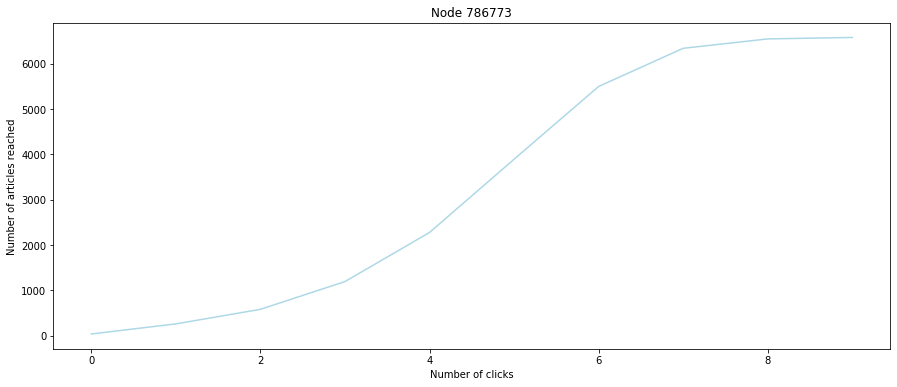

In [32]:
graph = []
for n_clicks in range(10):
    graph.append(len(get_articles(node_id,n_clicks)))
plt.figure(figsize = (15,6))
plt.plot(graph,color = 'lightblue');
plt.ylabel('Number of articles reached')
plt.xlabel('Number of clicks')
plt.title(f'Node {node_id}')
plt.show()

#### Comments on the obtained results: <br>
We have analyzed three different nodes that have out-degree equal to 3, 268 and 39. <br>
We can see that the trend of the curves are different: in the second and in the third case the curve tends to a certain value after some clicks while on the first case the curve seems to have an increasing trend even after 10 clicks. <br> So even if the first node is the one with the lowest out-degree, it is the node that can reach the highest number of nodes after a few clicks. That could be because it is like a hub that is linked to many nodes with high out-degree while the others two considered nodes are probably linked to nodes with low out-degree. <br> Finally we can say that starting the exploration from a node with high out-degree, does not mean to reach more nodes than starting from a node with lower out-degree.

### RQ3

First of all we have decided to visualize the number of categories with grade equal to n where n is the number of nodes belonging to it. <br> So we build a dictionary where the key is the grade and the value is the number of the categories with that grade.

In [33]:
# Creating the list of the grades for each category
abc = list(category_nodes.values())
counter = []
for elem in abc:
    counter.append(len(elem))

In [34]:
# Building the dictionary where, for each element of the set, we count the occurrencies and then we assign them to the grade
num_of_cat_nodes = {}
for elem in set(counter):
    num_of_cat_nodes[elem] = counter.count(elem)
    

In [35]:
# Transforming the dictionary to a DataFrame in order to easily plot it
df_forplot = pd.Series(num_of_cat_nodes).to_frame()
df_final = df_forplot.reset_index()
df_final.columns = ['Grade of category', 'Number of categories']
final_df = df_final.sort_values(by=['Grade of category'], ascending=True)
final_df.head(70)

,Grade of category,Number of categories
0,1,1622
1,2,804
2,3,477
3,4,321
4,5,241
...,...,...
65,66,3
66,67,3
67,68,2
68,69,6


In [36]:
'''This function is used just to plot the exact value near every bar in the histogram plot'''
def plot_values_in_barh(y):
    for index, value in enumerate(y):
        plt.text(value, index, str(round(value, 2)))

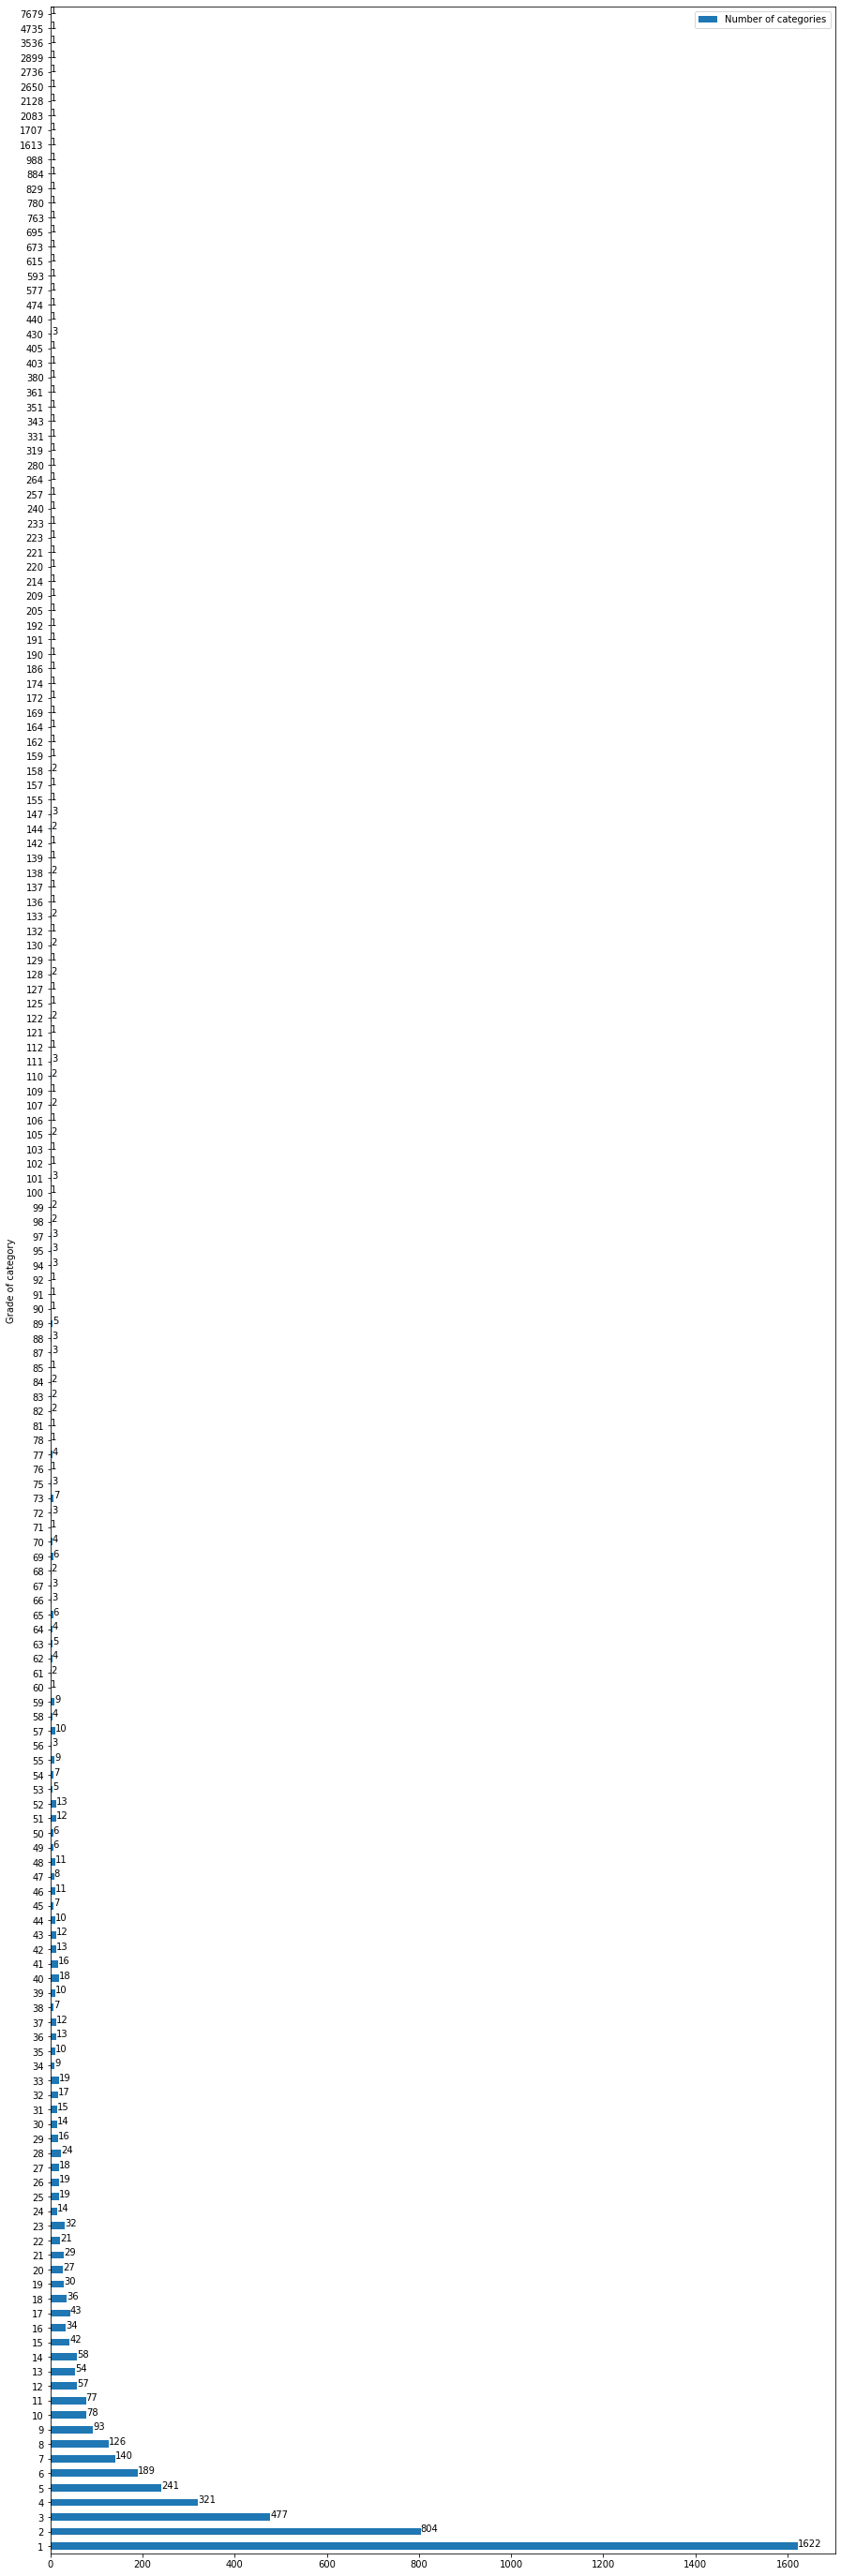

In [37]:
# Visualizing the number of categories with that grade
ax = final_df.plot.barh(x='Grade of category', y='Number of categories', figsize = (15,50))
plot_values_in_barh(list(final_df['Number of categories']))

In [38]:
# Visualizing the average size of a category in our network
statistics.mean(final_df['Number of categories'])

30.01142857142857

After this analysis we have thought to build a heuristic function that works in accetable time for the majority of categories.

#### Comments on the defined function :

Since the problem’s complexity is high we have decided to implement a function which find a good trade off between accuracy and speed.
Our function consists mainly in three steps: <br>
1.**Initial checks** : 
    - Retrieve set of nodes in C
    - At most one node with outdegree 0
    - Stop when finished or stucked in a cycle
2.**Criteria for choosing nodes** :
    - Maximize the number of nodes of interested visited in one iteration 
    - Pick the node with the greatest outdegree
    - Minimize the path 
3.**Final step** :
    - Concatenate the paths of every step
    - Return the minimum number of clicks required to reach all pages in p

    

Here an example of a not connected graph:

In [214]:
%%time
res = visit_all('Genoa_C.F.C._players')
print(res)

Nodes to visit [88453, 88665, 88672, 88968]
Center is node 88968 with indegree 10
Nodes to visit 2
Path to 88672 : [88672, 88810, 88850, 88761, 88968]
Nodes to visit 1
Path to 88665 : [88665, 88886, 88860, 88672]
Nodes {88453} cannot be reached from node 88665
Not possible
Wall time: 7min 2s


Here an example of a connected graph:

In [234]:
%%time
res = visit_all('Republic_of_Ireland_international_footballers')
print(res)

Nodes to visit [76919, 81108, 82484, 82809, 82891, 83662, 84000, 84115, 84621]
Center is node 82891 with indegree 32
Nodes to visit 6
Path to 82484 : [82484, 83114, 81942, 82350, 81875, 82891]
Nodes to visit 5
Path to 84115 : [84115, 83810, 83227, 81386, 82084, 80792, 82484]
Nodes to visit 4
Path to 82809 : [82809, 81856, 84115]
Nodes to visit 3
Path to 83662 : [83662, 81373, 82755, 81856, 82809]
Nodes to visit 2
Path to 84000 : [84000, 82479, 82779, 83662]
Nodes to visit 1
Path to 81108 : [81108, 81858, 81934, 81923, 84000]
Nodes {84621, 76919} cannot be reached from node 81108
Not possible
Wall time: 19min 19s


In [216]:
len(res[0])

14

In [231]:
# Commento da aggiungere
no = set(res[0]) - set(res[1])
yes = set(res[1])
c = set([res[1][-1]])
no_col = ['black']*len(no)
yes_col = ['green']*len(yes)
c_col = ['red']
a = dict(zip(no,no_col))
b = dict(zip(yes,yes_col))
c = dict(zip(c,c_col))
a.update(b)
a.update(c)

In [232]:
# Building the graph of the analyzed category 
reduced_graph = G.copy()
for i in list(G.nodes):
    if i in a.keys():
        pass
    else:
        reduced_graph.remove_node(i)
color_map =[]
for node in reduced_graph:
    color_map.append(a[node])


At this point we show the graph where:
- RED node is the central node
- GREEN nodes belong to the set of pages we are considering
- BLACK nodes are the one we pass through but we do not consider in the category

C:\Users\Eloisa\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


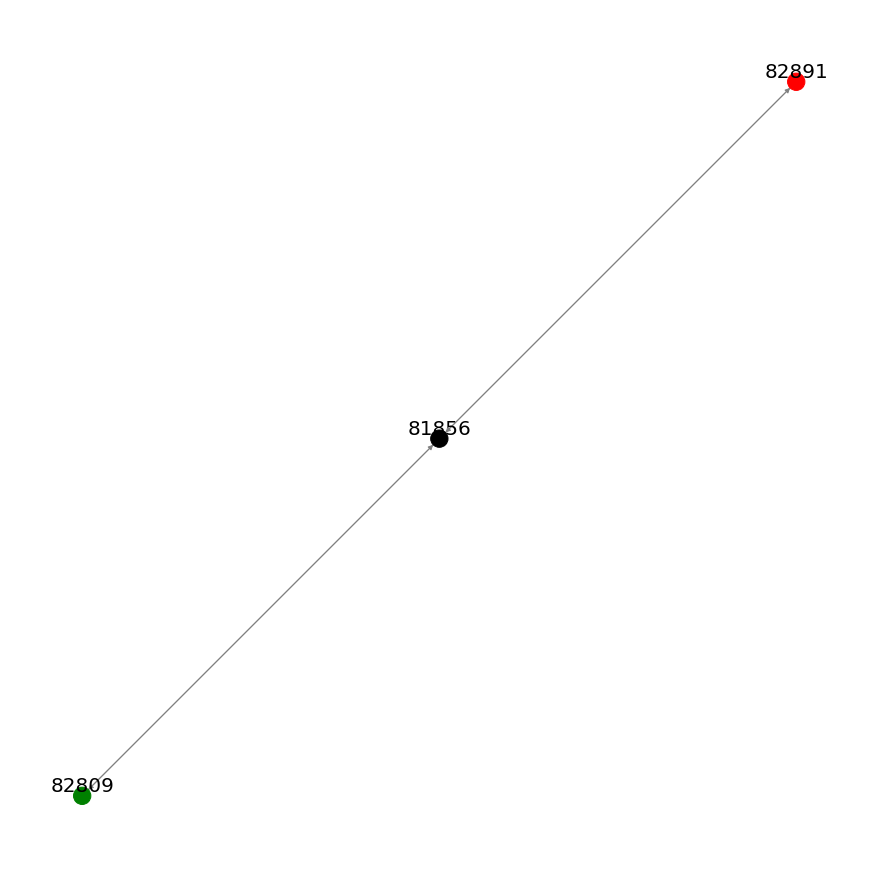

In [233]:
plt.figure(1, figsize=(12,12))
nx.draw(reduced_graph, node_color = color_map, with_labels=False, edge_color='gray', verticalalignment='bottom', font_size = 20)
plt.show()

### Useful functions

In [17]:
def explore(node,limit):
   
    ''' This function takes as an input one node and a click limit.
    Limit can be set to None if we don't want any limit.
    The function returns a dictionary where keys are distances and values are all the nodes 
    which are at distance d (key) from the input node'''
    
    # initializing variables
    distance_tree = {}
    explored = set()
    clicks = 1 
    
    # checking if node has at list one outlink
    try:
        out_nodes = set(out_links[node])
    except:
        print('No out-link from', node)
        return distance_tree
    
    '''
    1. We iterate until the new set of out-nodes to explore is non-empty 
    2. For each iteration we only consider unexplored nodes
    3. If the node is a key in out_links, we add the set of nodes associated to it to the new set of nodes
    4. We update all variables and increase distance by one'''

    while out_nodes != set(): 
        
        if limit != None:
            if clicks > limit+1:        
                return distance_tree
        
        distance_tree[clicks] = out_nodes
        new_out_nodes = set() 
        
        for node in out_nodes: 
            try:
                new_out_nodes = new_out_nodes.union(set(out_links[node])) 
            except:
                continue
        
        explored = explored.union(out_nodes) 
        out_nodes = new_out_nodes.difference(explored)
        clicks += 1 
    
    return distance_tree

In [18]:
def shortest_path (node1,node2):
    
    ''' This function takes in input two nodes and returns the length of the shortest path.
    If node 1 does not have any outlink or if no path is found between node 1 and node 2, None is returned. '''
    
    # exeptions
    if node1 == node2:
        return 0, []
    
    # set of outnodes of node 1
    try:
        out_nodes = set(out_links[node1]) 
    except:
        print('No out-link from', node1)
        return 'Inf', []
    
    # initializing explored nodes set and minimum distance
    explored = set() 
    clicks = 1
    parents =  {node : {1:[node1]} for node in out_nodes}
    
    ''' ITERATIONS: we iterate until we find node 2. In the case in which we have not found node 2 
    but we don't have any new node to explore, we assume the two nodes are disconnected.
    
    1. We check the new set of out-nodes to explore is non-empty 
    2. We iterate through unexplored nodes
    3. If the node is a key in out_links, we add the set of nodes associated to it to the 
    new set of nodes in order to proceed with exploration
    4. In order to retrieve the actual set of nodes met to get from node1 to node2,
    for each explored node we save its parent (or parents) at each iteration and retrace the path
    backwards from node2 to node 1.'''
   
    while node2 not in parents.keys(): 
        clicks += 1 
        
        if out_nodes != set(): 
            new_out_nodes = set() 

            for node in out_nodes:  
                try:
                    new_out_nodes = new_out_nodes.union(set(out_links[node]))
                    for new_node in out_links[node]:
                        if new_node in parents.keys():
                            if clicks in parents[new_node]:
                                parents[new_node][clicks].append(node)
                            else:
                                parents[new_node].update({clicks:[node]})
                        else:
                            parents[new_node] = {clicks:[node]}
                except:
                    continue

            explored = explored.union(out_nodes)
            out_nodes = new_out_nodes.difference(explored) 
    
        else: 
            print('No path found')
            return 'Inf', []
    
    path = [node2]
    while path[-1] != node1:
        path = get_reversed_path(parents,clicks,node2)
    
    return clicks, [node2]+path

In [188]:
def visit_all(C):
    
    ''' PRIMARY STEPS :
    1. We retrieve the set of nodes in C
    2. We find the center and check that it exists (meaning that at list one node has a non zero in-degree)
    3. We check that at most one node has outdegree 0'''
    
    p = copy.copy(category_nodes[C])
    max_indeg = 0
    out_deg_p = {}
    center = ''
    
    for node in p:
        if node in in_links.keys():    
            if len(in_links[node]) > max_indeg:
                center = node
                max_indeg = len(in_links[node])
        try:
            out_deg_p[node] = len(out_links[node])
        except:
            out_deg_p[node] = 0
    
    zero_outdeg = list(out_deg_p.values()).count(0)
    
    p = set_of_pages(p)
    print('Nodes to visit', p)
    
    if center == '' or zero_outdeg > 1:
        print('More than one node has outdegree zero')
        return 'Not possible'
    elif center in p:
        p.remove(center)
    
    print('Center is node', center, 'with indegree', max_indeg)
    
    ''' SECONDARY STEPS :
    Now we apply the "get_next" function until we either find all nodes or we are stuck for two consecutive
    iterations at the same node'''
    
    start = center
    exploration = [center]
    to_visit = set(copy.copy(p))
    
    while len(to_visit) >= 1:
        tree = explore(start, None)
        next_node, path, visited = get_next(start,to_visit,tree,out_deg_p)
        if next_node == start or next_node == None or path == []:
            return 'Not possible'
        exploration += path + [next_node]
        to_visit =  to_visit - visited
        start = next_node
    
    return exploration, p+[center]

In [19]:
def get_reversed_path(parents, dist, node):
    
    '''we iterate backwards from node2 to node1 through the parents dictionary until we find node1 
    at distance "clicks" from node 2. In the case of branched path we explore them randomly untile we 
    find the one we are interested in.'''
    
    path = []
    for i in reversed(range(1,dist+1)):
        parent_list = parents[node][i]
        if len(parent_list) > 1:
            index = random.randint(0,len(parent_list)-1)
            parent = parent_list[index]
        else:
            parent = parent_list[0]
        path.append(parent)
        node = parent
    
    return path

In [56]:
'''This function returns a subset of a list excluding the empty one.
   We use this function to get a set of poages from the requeted category'''
 

def set_of_pages(l):
    l_index = randint(0, len(l) - 1)
    r_index = randint(l_index + 1, len(l))
    new_list = l[l_index:r_index]
    return new_list

In [189]:
def get_next(start, p, tree, out_deg_p):
        
    ''' We want to sort all nodes left to visit by their distance from the starting node, in decreasing order.
    The nodes are sorted in this way to be more time efficient, since we avoid to look two times for the same 
    shortest path.
    1. We create a set of nodes that we want to find and generate the exploration tree of our start node.
    2. We iterate all the distances in the tree and if we find any of the nodes of interest we save them 
    in a dictionary.
    3. We get the list of nodes nodes to be visited sorted by furthest to the nearest. '''
    
    p_decreasing = sort_nodes(tree, p)
    if p_decreasing ==[]:
        print('Nodes', p, 'cannot be reached from node', start)
        return None, [], set()
    
    print('Nodes to visit', len(p_decreasing))
        
    ''' Now we want to get all shortest paths from start node to any other node left to visit. 
    1. We have a set of nodes to visit to be iterated in a specific order. We always pick the one which is 
    further away from the start node (element 0).
    2. We save the shortest path to this node in a dictionary, remove the node from the list of nodes to visit 
    and save the nodes that we have met along the path if they are in the set of nodes to visit.
    3. We remove all the other nodes of interest met along the way from the set of nodes to visit. 
    
    notice: we alredy know that these nodes will not have the greatest number of crossed nodes '''
    
    rel_path, crossed = get_paths(p_decreasing, p, start)
    
    ''' Among all nodes that are left to visit we pick as "next" according to this features:
    1. We check the node that maximises the number of crossed nodes. However if the outdegree of this node is 
    zero we check if we have any othe node to visit, if yes, we discard this node.
    2. If two nodes cross the same number of nodes, we pick the one with higher outdegree.
    3. If two nodes cross the same number of nodes and have equal outdegree, we pick the closer one'''
    
    best_node = p_decreasing[0]
    max_crossed = len(crossed[best_node])
    
    for node in crossed.keys():
        if len(crossed[node]) > max_crossed:
            if out_deg_p[node] == 0:
                if p - set(rel_path[node]+[best_node]) == set():
                    best_node = node
                    max_crossed = len(crossed[node])
            else:
                best_node = node
                max_crossed = len(crossed[node])

        elif len(crossed[node]) == max_crossed:          
            if out_deg_p[node] > out_deg_p[best_node] : 
                    best_node = node
            elif len(crossed[node]) > len(crossed[best_node]):
                best_node = node

    if rel_path[best_node] == []:
        print('Cannot reach', best_node)
    else:
        print('Path to', best_node, ':', rel_path[best_node])
    
    return best_node, rel_path[best_node], set(rel_path[best_node]+[best_node])

In [22]:
def sort_nodes(tree, p):
    
    distances = {}
    to_find = set(copy.copy(p))
    for d in tree.keys():
        visited = set(tree[d]).intersection(to_find)
        distances[d] = visited                 
    
    p_decreasing = collections.OrderedDict(sorted(distances.items()))
    p_decreasing = list(chain.from_iterable(list(p_decreasing.values())))
        
    return p_decreasing

In [208]:
def get_paths(p_decreasing, p, start):
    
    rel_path = {node:[] for node in p}
    crossed = {node:[] for node in p}
    to_visit = copy.copy(p_decreasing)
    
    while len(to_visit) >= 1:
        node = to_visit[0]
        clicks,path = shortest_path(start, node)
        rel_path[node] = path
        crossed_list = set(path).intersection(set(to_visit)) 
        crossed[node] = crossed_list 
        to_visit.remove(node)
        for node_a in crossed_list:
            if node_a in to_visit:
                to_visit.remove(node_a)
                
    return rel_path, crossed